# <font color = red> *** FILL YOUR INFORMATION HERE *** </font>
Type your name here <br>
Kris Papaleonidas <br>
<br>
Student number <br>
<br>
Utumail address  <br>
<br>
Date  <br>
9.10.2021

______________
# Data Analysis and Knowledge Discovery 2021 <br> Exercise 2, Data Understanding and Visualization

- This is the template for the second exercise. You can add more code and markup cells, as long as the flow of the notebook stays fluent and logical.

- The aim of this exercise is to practice data understanding; check the content and validity of the data, correct and select data, and apply basic descriptive statistics and visualization for further understanding.

- Two datasets are used: shipdata1_2021.csv and shipdata2_2021.csv. The same data will be used in the next exercise, with same attributes, but in a more cleaned format.<br> 

### General guidance for exercises 

- Answer **all** questions below, even if you can't get your script to fully work
- Write clear and easily readable code, include explanations what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- +1 bonus point (grading *Pass with honors*) requires a **completely** correct solution and also thorough analysis. 
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via moodle chat or email from course assistants.
- Note! Don't leave it to the last moment! No feedback service during weekends.

### Gather **all** packages needed for this notebook here:
- This does not mean that you can not use any packages not imported below, but the exercise can be done without importing any extras

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Show the plots inline in the notebook
%matplotlib inline

________

#  <font color = dimgrey> Know your data: an introduction to the data and domain knowledge </font>

The data used in this exercise is a subset from the Marine Traffic portal. More information available for example here:
- https://www.marinetraffic.com/blog/information-transmitted-via-ais-signal/
- https://www.diva-portal.org/smash/get/diva2:833998/FULLTEXT01.pdf
- https://www.marinetraffic.com/en/data/

The exercise data has the following columns/attributes:
- **MMSI**

    * Maritime Mobile Service Identity. A radio-identification number that uniquely identifies a ship. The first three numbers tell the nationality of the ship - for example finnish ships would have the number 266 preceding them. The following six digits are the identifying part unique to each ship. <br> 
    
- **Speed**
    * The speed (in knots x10) that the subject vessel is reporting according to AIS transmissions
- **COG**
    * Course Over Ground<br> COG=3600 means “not available”
- **Destination**
    * The Destination of the subject vessel according to the AIS transmissions
- **Ship_type**
    * The Shiptype of the subject vessel according to AIS transmissions -
- **Gross_tonnage**
    * unitless measure that calculates the moulded volume of all enclosed spaces of a ship
- **Length**
    * The overall Length (in metres) of the subject vessel
- **Breadth**
    * The Breadth (in metres) of the subject vessel

________
## <font color = dimgrey> 1. Data import </font> 

Datasets for this exercise are available via the following url-paths
- https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata1_2021.csv
- https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata2_2021.csv
_____________________

**a)** First load data files shipdata1.csv and shipdata2.csv using pandas.
-  *Note! Files were prepared by two different persons, so there are differences in the file formatting!*

In [2]:
# Here are the paths to the files
##################################
# Load shipdata1.csv
url1 = 'https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata1_2021.csv' 
# Load shipdata2.csv
url2 = 'https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata2_2021.csv'
#Print/show in notebook first 5 rows of both dataframes. 

In [3]:
# Your script for 1.a) here
df_shipdata1 = pd.read_csv("shipdata1_2021.csv")
df_shipdata2 = pd.read_csv("shipdata2_2021.csv")

**b)** Print/show in notebook first 5 rows of both dataframes. 

In [4]:
# Script here
df_shipdata1.head(5)
df_shipdata2.head(5)

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,538002778,"11,3631","74,6552",Porvoo,Tanker,30641,195,"32,24"
1,636016752,"11,7","74,6",Porvoo,Tanker,3853,"92,9","15,3"
2,244870429,"11,7126","69,5662",Porvoo,Tanker,7251,115,"18,6"
3,305653000,"10,8253","56,4266",Porvoo,Cargo,6668,"107,03","18,42"
4,235060255,"11,7311","80,9",Primorsk,Tanker,23353,"184,0","27,7"


**c)** For the vessel with **MMSI 231844000**, search for gross tonnage, length and breadth from one of the datasets 

In [5]:
# Script here
#############
result = df_shipdata1.loc[df_shipdata1['MMSI'] == 231844000]
result[['MMSI', 'Gross_tonnage', 'Length', 'Breadth']]

,MMSI,Gross_tonnage,Length,Breadth
49,231844000,2876,88.9,13.2


_________
## <font color = dimgrey> 2. Fix numeric data

**a)** The dataframes have one systematic difference in numerical values. Look at the previous printouts: **What is the difference?**

In [6]:
# Comparing the two datasets
df_shipdata1.equals(df_shipdata2)
df_shipdata1.dtypes
df_shipdata2.dtypes

MMSI              int64
Speed            object
COG              object
Destination      object
Ship_type        object
Gross_tonnage     int64
Length           object
Breadth          object
dtype: object

**b)** Fix this issue so that you correct shipdata2 dataframe to similar formatting as in shipdata1.

In [7]:
# Script here
# Some kind of loop might be good for daily usage and bigger data
Columns = {"Speed", "COG", "Length", "Breadth"}

for columName in Columns:
    df_shipdata2[columName] = df_shipdata2[columName].str.replace(',', '.').astype(float)
    df_shipdata2[columName] = df_shipdata2[columName].astype(float)

df_shipdata2.dtypes

MMSI               int64
Speed            float64
COG              float64
Destination       object
Ship_type         object
Gross_tonnage      int64
Length           float64
Breadth          float64
dtype: object

**c)** Print first 5 rows of  the now fixed  shipdata2 dataframe. 

In [8]:
# Script here
df_shipdata2.head(5)

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,538002778,11.3631,74.6552,Porvoo,Tanker,30641,195.00,32.24
1,636016752,11.7000,74.6000,Porvoo,Tanker,3853,92.90,15.30
2,244870429,11.7126,69.5662,Porvoo,Tanker,7251,115.00,18.60
3,305653000,10.8253,56.4266,Porvoo,Cargo,6668,107.03,18.42
4,235060255,11.7311,80.9000,Primorsk,Tanker,23353,184.00,27.70


__________
## <font color = dimgrey> 3. Combine dataframes together

*Tip for this section: Each subtask can be easily done with one (or two) line(s) of code when using Pandas.*

**a)** Add an additional column/attribute Origin which indicates the origin of the data (values 1, 2, according to shipdata name). This is often helpful for possible detective work, if there are any further direpancies in the data.

In [9]:
# Script here
df_shipdata1['Origin'] = 1
df_shipdata2['Origin'] = 2

**b)** Combine the two separate dataframes as one new dataframe.

In [10]:
# Script here
frames = [df_shipdata1, df_shipdata2]
df_combined_shipdata = pd.concat(frames)

**c)** Check a sample of the new dataframe by taking a random sample of six rows and printing it.

In [11]:
# Script here
df_combined_shipdata.sample(6)

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
8,246591000,9.2000,74.6000,Hamina,Cargo,8620,137.10,19.10,1
66,538002778,11.3631,74.6552,Porvoo,Tanker,30641,195.00,32.24,1
67,636016683,10.9000,75.4000,Porvoo,Tanker,5440,108.00,16.80,1
27,370756000,12.8000,82.5000,Ust-Luga,Tanker,28777,180.00,32.20,2
0,212209000,10.1000,64.3000,Hamina,Cargo,3416,94.90,15.30,1
32,305813000,10.0533,84.8581,Ust-Luga,Cargo,2452,87.84,12.90,2


**d)** Check the shape of the new dataframe, try using df.info(). What information can you find in the output?

In [12]:
# Script here
df_combined_shipdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 66
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MMSI           136 non-null    int64  
 1   Speed          136 non-null    float64
 2   COG            136 non-null    float64
 3   Destination    136 non-null    object 
 4   Ship_type      135 non-null    object 
 5   Gross_tonnage  136 non-null    int64  
 6   Length         136 non-null    float64
 7   Breadth        136 non-null    float64
 8   Origin         136 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 10.6+ KB


<font color = red> The method shows index dtype and columns, non-null values and memory usage. In other words it prints a summary of a dataframe. </font>



__________
## <font color = lightcoral> 4. Data cleaning

**a)** Check if there are any missing data.

In [13]:
# Script here
# Number of rows with missing values
df_combined_shipdata.isnull().any(axis = 1).sum()
# Print the null data
print (df_combined_shipdata[df_combined_shipdata.isnull().any(axis = 1)])


         MMSI  Speed   COG Destination Ship_type  Gross_tonnage  Length  \
62  273374820   10.0  74.6     Vysotsk       NaN           4979  1399.0   

    Breadth  Origin  
62     16.7       2  


**b)** Check if there any duplicate data; any vessel in the dataframe several times?

In [14]:
# Script here
# Number of duplicated rows
#df_combined_shipdata.duplicated().sum()
# Print all duplicated rows
#print (df_combined_shipdata[df_combined_shipdata.duplicated()])
# Sum and index empty so no duplicated data in dataframe

dupRows = df_combined_shipdata.duplicated(subset=None, keep='first')
print (dupRows)

dfObj = pd.DataFrame(df_combined_shipdata, columns=['MMSI'])
dfDupRow = dfObj[dfObj.duplicated()]
print (dfDupRow)

0     False
1     False
2     False
3     False
4     False
      ...  
62    False
63    False
64    False
65    False
66    False
Length: 136, dtype: bool
        MMSI
0  538002778
1  636016752


**c)** Resolve missing data and remove duplicate data.

In [15]:
# Script here
# Drop duplicates
df_combined_shipdata.drop_duplicates(subset=['MMSI'], keep=False, inplace=True)

# Fill/replace NaN values with string "Missing Value"
df_combined_shipdata = df_combined_shipdata.fillna("Missing Value")


**d)** Print out proof that there are no more missing or duplicate data

In [16]:
# Script here
# Number of rows with missing values
df_combined_shipdata.isnull().any(axis = 1).sum()
# Number of duplicated rows
df_combined_shipdata.duplicated().sum()

0

____________
## <font color = Navy> 5. Descriptive statistics

####  a) Check data types and correct if needed

Because Python does not require separate variable declaration, it is always a good practice to check the data types. Check the data types for the attributes and 
- convert MMSI to object or string if needed (e.g. to exclude from numeric comparison)
- convert object or string typed numeric attributes to float.

In [28]:
# Script here
df_combined_shipdata["MMSI"] = df_combined_shipdata["MMSI"].astype(object)
df_combined_shipdata["MMSI"] = df_combined_shipdata["MMSI"].astype(object)

df_combined_shipdata.dtypes

# Some kind of loop might be good for daily usage and bigger data
#Columns = {"Speed", "COG", "Length", "Breadth"}

#for columName in Columns:
 #   df_shipdata2[columName] = df_shipdata2[columName].str.replace(',', '.').astype(float)
  #  df_shipdata2[columName] = df_shipdata2[columName].astype(float)

MMSI              object
Speed            float64
COG              float64
Destination       object
Ship_type         object
Gross_tonnage      int64
Length           float64
Breadth          float64
Origin             int64
dtype: object

**b)** Print count, mean. Std, min, quartiles (25%, 50%, 75%) and max for all numeric attributes 
- *This can be done with one line - if your answer gets long consider changing your approach.*

In [35]:
# Script here
df_combined_shipdata.describe()


,Speed,COG,Gross_tonnage,Length,Breadth,Origin
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,10.436667,78.326411,13479.053030,136.559470,20.132424,1.492424
std,1.965614,15.845129,18494.123564,124.821246,9.954783,0.501847
min,5.500000,53.326400,100.000000,15.000000,5.000000,1.000000
25%,8.936525,70.771450,2543.000000,88.750000,12.875000,1.000000
50%,10.200000,74.900000,5348.500000,115.000000,16.900000,1.000000
75%,11.717225,81.486900,15408.750000,160.250000,24.160000,2.000000
max,17.082500,157.267300,81502.000000,1399.000000,48.040000,2.000000


**b)** Print count, mean. Std, min, quartiles (25%, 50%, 75%) and max for all numeric attributes. Check the values. Does the comparison make sense here, taken also the meaning of each attribute (i.e. understand your data)?

In [34]:
# Script here
q25 = df_combined_shipdata.quantile([0.25])
q50 = df_combined_shipdata.quantile([0.50])
q75 = df_combined_shipdata.quantile([0.75])
max = df_combined_shipdata.max

q25
q50
q75
max

,Speed,COG,Gross_tonnage,Length,Breadth,Origin
0.75,11.717225,81.4869,15408.75,160.25,24.16,2.0


**c)** Choose Breadth and two (2) other numeric attributes that you would like to focus and know more. Print descriptive statistics only for these **but leave out everything else except mean, std and max**. 

- *Tip: check the type of the output of the function you used in the last step. What is the type and how could you subset it? What did you learn about pandas indexing in the first exercise?*

In [20]:
# Script here

 **d)** Descriptive statistics by Ship_type <br>
- Print the descriptive statistics now by each ship type for those three attributes used in the previous task.<br> 
"by" here means that you group by that variable.
- *Tip! A wide Pandas table can be easily rotated using transpose, for better readability in the jupyter notebook.*<br>

In [21]:
# Script here

**e)** How many ship types there are? Which Ship type has the largest breadth?

<font color = red> \*** Answer here *** </font>

_______________
## <font color = forestgreen> 6. Visualizations </font>

### A few more words on matplotlib and seaborn

As you saw in the first exercise, matplotlib plotting is structured with the 'axes' and 'figure' objects. The meaning and the names of these can be somewhat confusing so here is a small example and explanation of them to avoid confusion in the future. This small explanation tries to help you avoid common mistakes and frustration. 
    
- The **<font color = dimgrey> figure </font>** object contains all plotting elements, in other words everything we see. You can think of it as a canvas where things are drawn. 
- A figure can have many **<font color = blue> axes </font>**. They are the objects you plot on to. The axes can even overlap and their position is defined relative to the figure. 
    
####  Seaborn and matplotlib
- Seaborn goes together with matplotlib, and can be thought to be an extension of it, but there are some things that can confuse you along the way if their relationship is presented like this. One tip in particular that one might have problems with is that in seaborn there are figure-level, axes-level plots. Figure level plots dont work with a matplotlib subplot and are used so that only one plot is made per figure. Axes level plots can be put into subplots like matplotlib plots as you saw in the first exercise. 
    
    
     
- Below is an example that illustrates how **<font color = dimgrey> figures </font>**and **<font color = blue> axes </font>** work together in matplotlib. The comments explain what is done in every row of code. <font color = green> You are encouraged to play around with it, but its not required in terms of the exercise" </font>. You can for example try to make a similar plot-inside-plot with the exercise data.
    

In [22]:
#Lets make some example data.
x_example_data = np.linspace(0,5,10)
y_example_data = x_example_data**2

Text(3, 5, 'This is a text object relative to the inner axes')

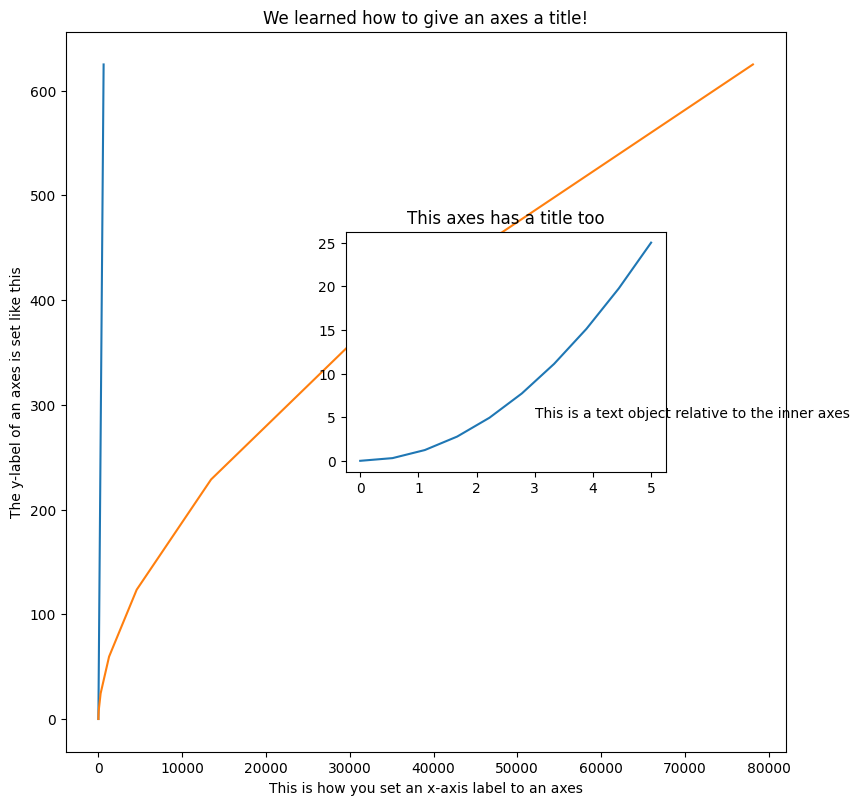

In [23]:
### Make the figure and axes objects ###
example_figure = plt.figure(figsize =(8,8), dpi = 100) #you give the size of the figure as a tuple of inches
example_axes_outer = example_figure.add_axes([0.1, 0.1, 0.9, 0.9]) #The list argument gives the relative location of the axes in percentage from the corners of the figure. The order is left, bottom, right, top. 
example_axes_outer.set_xlabel("This is how you set an x-axis label to an axes")
example_axes_outer.set_ylabel("The y-label of an axes is set like this")
example_axes_outer.set_title("We learned how to give an axes a title!")
example_axes_inner = example_figure.add_axes([0.45, 0.45, 0.4, 0.3])
example_axes_inner.set_title("This axes has a title too")

### Add something to the axes ###
example_axes_inner.plot(x_example_data, y_example_data)

# Multiple things, like lines can be plotted on same axis. 
example_axes_outer.plot(x_example_data**4, y_example_data**2)
example_axes_outer.plot(x_example_data**7, y_example_data**2)

# If you want to add other objects, you add them to axes too, like text
# Now you specify the location relative to the parent axes
example_axes_inner.text(3, 5, "This is a text object relative to the inner axes")

#Many more things can be added to axes in a similar way, not just text. 
#For more information there are many good tutorials available for example in youtube. 

_________
## <font color = Green> 7. Visualizing attribute value distributions </font>
**a)** Plot four histrograms of the Breadth using the Sturges', Scott's, square root and Freedman-Diaconis' methods to determine the number of bins. How are the numbers of bins calculated? Compare the distributions of different ship types. Do you think this a feasible attribute for classification, why? 

- Tip: it would be nice to use subplots when you have more than one plot. 

(array([ 7., 41., 39., 14., 11., 12.,  0.,  1., 11.]),
 array([ 5.        ,  9.78222222, 14.56444444, 19.34666667, 24.12888889,
        28.91111111, 33.69333333, 38.47555556, 43.25777778, 48.04      ]),
 <BarContainer object of 9 artists>)

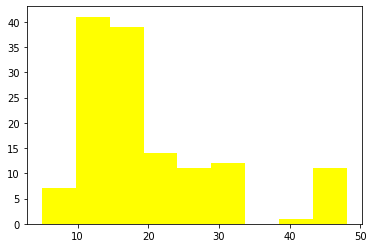

In [24]:
### Script here
plot_shipdata = df_combined_shipdata
#fig, ax = plt.subplot()

#plt.hist(plot_shipdata['Breadth'], bins ='sturges', color = 'red')
#plt.hist(plot_shipdata['Breadth'], bins = 'scott', color = 'blue')
#plt.hist(plot_shipdata['Breadth'], bins = 'sqrt', color = 'green')
plt.hist(plot_shipdata['Breadth'], bins = 'fd', color = 'yellow')

<font color = red> \*** Bins are calculated with different formulas and they divide the range between the smalles and largest value of the sample into bins of equal size. As a attribute the breadth could be used for classification, beceause it gives some idea of the size and weight of the ship. And therefore you could determine wheter the it's a tanker or a cargo ship. *** </font>

**b)** Compare the distributions of the Breath variable between different ship types. Do you think this a feasible attribute for classification, why?
- *Tip What kind of plot can you do on a continuous variable? You only need to produce one plot, not multiple.*

(array([ 7., 41., 39., 14., 11., 12.,  0.,  1., 11.]),
 array([ 5.        ,  9.78222222, 14.56444444, 19.34666667, 24.12888889,
        28.91111111, 33.69333333, 38.47555556, 43.25777778, 48.04      ]),
 <BarContainer object of 9 artists>)

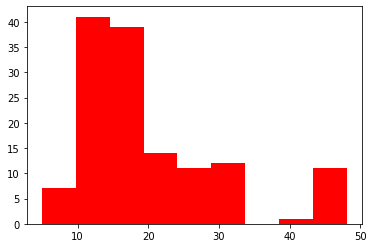

In [25]:
# Script here
plt.hist(plot_shipdata['Breadth'], bins ='auto', color = 'red')

<font color = red> \*** Same question as before? As a attribute the breadth could be used for classification, beceause it gives some idea of the size and weight of the ship. And therefore you could determine wheter the it's a tanker or a cargo ship. *** </font>

**c)**	Explain what a boxplot is. Plot them for the numeric attributes (excluding 'Origin') grouped by the ship type. Do you see outliers that require some action?

<AxesSubplot:>

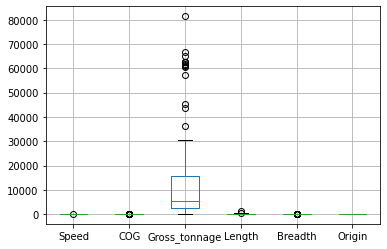

In [26]:
# Script here

plot_shipdata.boxplot()

<font color = red> \*** Boxplot is simple way to represent data in statistics. Boxplot shows five-number summary of a set of data: minimum, first (lower) quartile, media, third (upper) quardile and maximum.

Yes, there is outliers in my opinion that requires some action.  *** </font>

##  <font color = purple> 8. Relationships between attributes

#### a) Plot pairwise scatter plots of the numerical attributes. What kind of relationships can you see? Can you see any outliers? 
- *this can be done in one line*

array([[<AxesSubplot:xlabel='Speed', ylabel='Speed'>,
        <AxesSubplot:xlabel='COG', ylabel='Speed'>,
        <AxesSubplot:xlabel='Gross_tonnage', ylabel='Speed'>,
        <AxesSubplot:xlabel='Length', ylabel='Speed'>,
        <AxesSubplot:xlabel='Breadth', ylabel='Speed'>,
        <AxesSubplot:xlabel='Origin', ylabel='Speed'>],
       [<AxesSubplot:xlabel='Speed', ylabel='COG'>,
        <AxesSubplot:xlabel='COG', ylabel='COG'>,
        <AxesSubplot:xlabel='Gross_tonnage', ylabel='COG'>,
        <AxesSubplot:xlabel='Length', ylabel='COG'>,
        <AxesSubplot:xlabel='Breadth', ylabel='COG'>,
        <AxesSubplot:xlabel='Origin', ylabel='COG'>],
       [<AxesSubplot:xlabel='Speed', ylabel='Gross_tonnage'>,
        <AxesSubplot:xlabel='COG', ylabel='Gross_tonnage'>,
        <AxesSubplot:xlabel='Gross_tonnage', ylabel='Gross_tonnage'>,
        <AxesSubplot:xlabel='Length', ylabel='Gross_tonnage'>,
        <AxesSubplot:xlabel='Breadth', ylabel='Gross_tonnage'>,
        <AxesSubplot:xl

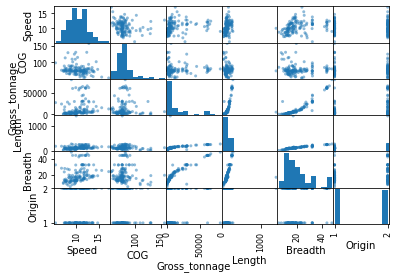

In [27]:
# Script here
pd.plotting.scatter_matrix(plot_shipdata)

<font color = red> \*** Answer here *** </font>

**b)** Make a new clean dataframe without outlier(s) and replot. What difference do you see? 
- *include the most relevant attributes only, or limit to those needed in next task*

In [28]:
# Script here

<font color = red> \*** Answer here *** </font>

__________
## <font color = purple> 9. Correlation and heatmap </font>

**a)** Explain what are
- Pearson's correlation
- Spearman's rho and 
- Kendall's tau?

<font color = red> \*** <br>

- Pearson's Correlation coefficient is a test in statistics to measure the statistical realtionship or association between two continous variables. <br>
- Spearman's Rho measures the strength of association between two variables. It measures the correlation coefficient in terms of the propotion of variability. <br>
- Kendall's tau measures the strength of association between two variables. It measures the strenght of the dependece and does not act like, or is nearly equivalent in the way as Pearson's and Spearman's are correlating normally distributed data. *** </font>

**b)** Calculate the correlation coefficient matrices. What kind of relationships there are between the attributes? You can use a heatmap to visualize the matrices and more easily see the strength of the relationship. **See what kind of a difference there is between the cleaned dataset and the non-cleaned dataset.**

In [29]:
#Script here

<font color = red> \*** Answer here *** </font>

____________
## <font color = dollargreen >   10. BONUS Dimensionality reduction</font>  
- <font color = red> Answers that only state what you can see are not enough. </font> You need to explain _why_ rather than what and demonstrate you understand what you are doing. By copypasting code from stackoverflow you will not learn much.
____________

- **a)** Explain what principal component analysis is.

<font color = red> \*** Answer here *** </font>

- **b)** Do it with and without z-score standardization. 

In [30]:
# Script: PCA with z-score standardization

In [31]:
# Script: PCA without z-score standardization

- **c)** Visualize the results with a scatter plot by projecting the data to the first two principal components.

In [32]:
# Script: Plot principal components

- **d)** How much of the variation is explained with the two principal components? What do you think this means? Where does the variation come from? 

In [33]:
# Script: Explore variation

<font color = red> \*** Answer here *** </font>